In [29]:
import numpy as np
from numpy.random import rand
from numpy import random
from collections import deque
import matplotlib.pyplot as plt

In [1]:
X = [[0, 0],
    [0, 1],
    [1, 0],
    [1, 1]]
y = [1, 2, 2, 3]

In [18]:
a = [0, 1, 2, 3, 4, 5, 6, 7]

hiddenLayers(a)

[(0, 1), (1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7)]

In [25]:
sinh = lambda y: (np.exp(y) - np.exp(-y)) / 2
cosh = lambda y: (np.exp(y) + np.exp(-y)) / 2
tanh = lambda y: sinh(y) / cosh(y)
tanh_pr = lambda y: 1 - tanh(y) ** 2

def sigmoid(y, a=1):
    return 1 / (1 + np.exp(-a * y))

def sigmoid_pr(z):
    return z * (1 - z)

In [17]:
def hiddenLayers(a):
    b = a.copy()
    b.insert(0, 0)
    return [i for i in zip(b, a)][1:]

In [19]:
def getActivationFunc(activation):
    activations = {'sigmoid': (sigmoid, sigmoid_pr), 'tanh': (tanh, tanh_pr)}
    return activations[activation]    

In [99]:
def weight(nInput, nNeuron):
    return np.random.rand(nInput + 1, nNeuron)

In [109]:
def randomWeight(hiddenLayers):
    ws = []
    for nInput, nNeuron in hiddenLayers:
    # for nInput, nNeuron in self.hiddenLayers[:-1]:
        w = weight(nInput, nNeuron)
        w = w.reshape(w.shape[0], -1)
        ws.append(w)

    return ws

In [110]:
hiddenLayers(a)

[(1, 2), (2, 3), (3, 4), (4, 5), (5, 6)]

In [114]:
a = [1, 2, 3, 4, 5, 6]
# randomWeight(hiddenLayers(a))

In [562]:
class NeuralNetwork:
    def __init__(self, layers, activation='sigmoid', batch=2):
        self.layers = layers
        self.activation, self.activ_pr = getActivationFunc(activation)
        self.hiddenLayers = hiddenLayers(layers)
        self.w = self.randomWeight()
        self.batch = batch
        
    def randomWeight(self):
        ws = []
        for nInput, nNeuron in self.hiddenLayers:
            w = weight(nInput, nNeuron)
            w = w.reshape(w.shape[0], -1)
            ws.append(w)

        return ws
    
    def forwardprop(self, X, ws):
        outputs = [X]
        # print('fordward prop')
        # print('outputs', outputs)
        
        for w in ws:
            biased_X = np.append(X, 1)
            a = np.dot(biased_X, w) # a : x dot w
            X = self.activation(a) # output of sigmoid
            outputs.append(X)

            # print('w.shape:', w.shape)
        
        return outputs
    
    def dropback(self, X, y, w, outputs, alpha):
        # the last layer
        outputs = outputs[::-1]

        z = outputs[0] # a(L)
        # print('z', z)

        # last layer delta
        # print('(y - z).shape', (y - z).shape)
        delta = (y - z) * self.activ_pr(z)
        # print('delta.shape', delta.shape)
        
        # other layer
        outputs = outputs[1:]
        w = w[::-1]
        deltas = [delta]
        
        # print('output', outputs)
        # print('deltas', deltas)

        # try to fix this
        for i in range(len(outputs) - 1):
            # print('backprop')
            # update the weight
            
            # add the bias
            output = np.append(outputs[i], 1)
            delta = deltas[i]
            
            output = np.atleast_2d(output)
            delta = np.atleast_2d(delta)
            
            
            # print('output.shape', output.shape)
            # print('delta.shape', delta.shape)
            # print(deltas[i])

            delta_w = alpha * np.dot(output.T, delta)
            w[i] += delta_w
            
            # print('w.shape', delta_w.shape)
            weight = w[i]
            
            # print('weight.shape', weight.shape)
            # print('delta.shape', delta.shape)
            
            dot = np.dot(delta, weight.T)
            dot = np.atleast_2d(dot)
            # print('dot.shape', dot.shape)
            delta = self.activ_pr(output) * dot
            # print(delta)
            deltas.append(delta[0][:-1])
            # print(deltas)
            # print('delta shape after extraction', delta.shape)
            
        # first layer weight
        # print('deltas', deltas)
        delta = deltas[-1]
        biased_X = np.append(X, 1)
        
        biased_X = np.atleast_2d(biased_X)
        delta = np.atleast_2d(delta)
        
        # print('a.shape', biased_X.shape)
        # print('delta.shape', delta.shape)
        
        delta_w = alpha * np.dot(biased_X.T, delta)
        # print('w', w)
        # print('delta_w.shape', delta_w.shape)
        w[-1] += delta_w
        
        w = w[::-1]

        return w

    def fit(self, X, y, learning_rate=0.2, steps=100000, tol=5e-2):
        k = self.layers
        w = self.randomWeight()
        
        # X = np.column_stack((X, np.ones(X.shape[0])))
        RMS_errors = []
        suc = False
        
        for step in range(steps):
            idx = random.choice(len(X))

            x, target = X[idx], y[idx]
            
            # print('w', w)
            outputs = self.forwardprop(x, w)
            w = self.dropback(x, target, w, outputs, 0.2)
            
            # don't use RMSE -> use lost instead
            cur_X, RMS_error = self.find_RMS_error(X, y, w)
            if RMS_error.all() < tol:
                suc = True
                break
            
            # collect results
            RMS_errors.append(RMS_error)
            # print('step', step)
            # print('cur_X', cur_X)
            # print('RMS_error', RMS_error)
            
            # print output
            if step % 2000 == 0:
                
                print('''
                Step: {}
                Training Results(data, prediction, expected):
                '''.format(step))
                
                for i in range(len(cur_X)):
                    print('[{} {}], {}, {}'.format(X[i][0], X[i][1], cur_X[i].argmax(), y[i].argmax()))
                
                print('RMS_err: {:.5f}'.format(RMS_error.max()))
                
        if suc:
            print('NN training succeeded!')
        else:
            print('NN training failed.')
        
        self.w = w
        
        return w, RMS_errors
            
    def find_RMS_error(self, X, y, w):
        z = []
        for x in X:
            last_output = self.forwardprop(x, w)[-1]
            z.append(last_output)
        z = np.array(z)
        
        # print('z', z)

        error = sum((y - z)**2) / len(y)
        RMS_err = np.sqrt(error)
        
        return z, RMS_err

    def predict(self, X):
        preds = []
        for x in X:
            prediction = self.forwardprop(x, self.w)
            preds.append(prediction[-1])
        preds = np.array(preds)
        return preds.argmax(1)
    
    # def visual_NN_boundaries(self, Nsamp=2000):

In [567]:
nn = NeuralNetwork([2,5,4,3], activation='sigmoid')

X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
    [.5, .5]])
y = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 1, 0],
    [0, 0, 1],
    [1, 0, 0]])

step = 50000
w, RMS_errors = nn.fit(X, y, steps=step)


                Step: 0
                Training Results(data, prediction, expected):
                
[0.0 0.0], 0, 0
[0.0 1.0], 0, 1
[1.0 0.0], 0, 1
[1.0 1.0], 0, 2
[0.5 0.5], 0, 0
RMS_err: 0.76003

                Step: 2000
                Training Results(data, prediction, expected):
                
[0.0 0.0], 1, 0
[0.0 1.0], 1, 1
[1.0 0.0], 1, 1
[1.0 1.0], 1, 2
[0.5 0.5], 1, 0
RMS_err: 0.49000

                Step: 4000
                Training Results(data, prediction, expected):
                
[0.0 0.0], 0, 0
[0.0 1.0], 0, 1
[1.0 0.0], 0, 1
[1.0 1.0], 0, 2
[0.5 0.5], 0, 0
RMS_err: 0.49312

                Step: 6000
                Training Results(data, prediction, expected):
                
[0.0 0.0], 0, 0
[0.0 1.0], 1, 1
[1.0 0.0], 1, 1
[1.0 1.0], 1, 2
[0.5 0.5], 1, 0
RMS_err: 0.49053

                Step: 8000
                Training Results(data, prediction, expected):
                
[0.0 0.0], 0, 0
[0.0 1.0], 0, 1
[1.0 0.0], 0, 1
[1.0 1.0], 0, 2
[0.5 0.5], 0, 0


1. generate our non-linear training sample


In [568]:
pred_y = nn.predict(X)

In [569]:
pred_y

array([0, 1, 1, 2, 0])

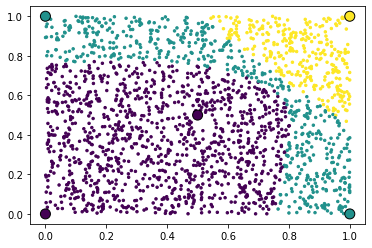

In [570]:
x1 = rand(2000)
x2 = rand(2000)

test_X = np.column_stack((x1, x2))
test_Y = nn.predict(test_X)
test_Y = np.array(test_Y)

plt.scatter(test_X[:,0], test_X[:,1], c=test_Y, s=6)
plt.scatter(X[:, 0], X[:, 1], c=y.argmax(1), s=100, edgecolors='k')